In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("E:\Data Science\kraggle Datasets\heart (1).csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [11]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

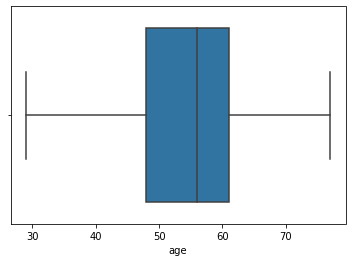

In [18]:
sns.boxplot(df.age)
plt.show()

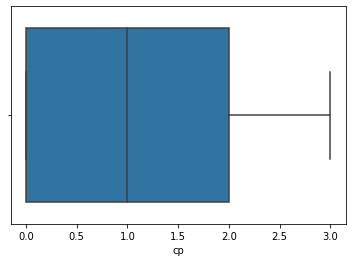

In [20]:
sns.boxplot(df.cp)
plt.show()

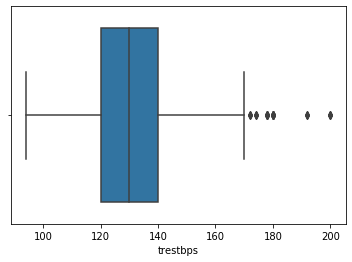

In [21]:
sns.boxplot(df.trestbps)
plt.show()

In [32]:
#Removing Outliers
Q3 = df["trestbps"].quantile(0.75)
Q1 = df["trestbps"].quantile(0.25)
IQR = Q3-Q1
print(Q3)
print(Q1)
print("Inter Quartile Range: ",IQR)

140.0
120.0
Inter Quartile Range:  20.0


In [34]:
lower_limit = Q1 - (IQR*1.5)
upper_limit = Q3 + (IQR*1.5)
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit 90.0
upper_limit 170.0


In [48]:
df_trim = df[(df["trestbps"] > lower_limit)  & (df["trestbps"]<upper_limit)]
df_trim

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


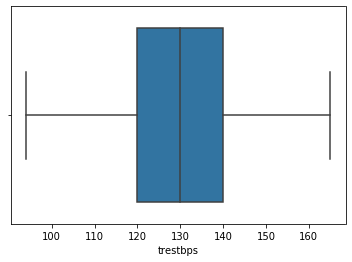

In [39]:
# outliers remove in column trestbps
sns.boxplot(df_trim["trestbps"])
plt.show()

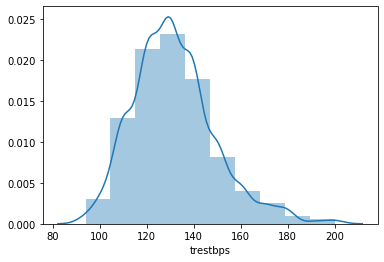

In [22]:
sns.distplot(df['trestbps'],bins=10)
plt.show()

In [23]:
df.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

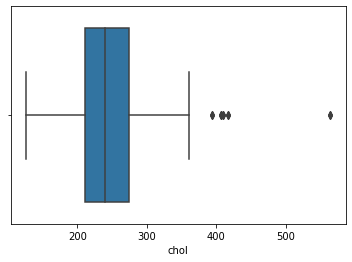

In [42]:
sns.boxplot(df.chol)
plt.show()

In [49]:
Q3 = df_trim["chol"].quantile(0.75)
Q1 = df_trim["chol"].quantile(0.25)
print(Q3)
print(Q1)
IQR = Q3-Q1
print("Value of Inter Quartile Range :",IQR)

274.0
209.0
Value of Inter Quartile Range : 65.0


In [50]:
lower_limit = Q1 - (IQR*1.5)
upper_limit = Q3 + (IQR*1.5)
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_limit 111.5
upper_limit 371.5


In [51]:
df_t1 = df_trim[(df_trim["chol"]>lower_limit) & (df_trim["chol"]< upper_limit)]

In [52]:
df_t1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


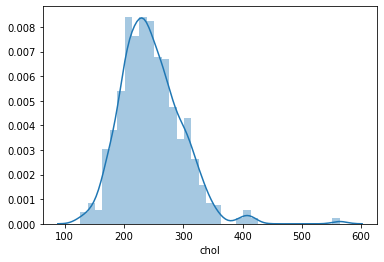

In [74]:
sns.distplot(df["chol"])
plt.show()

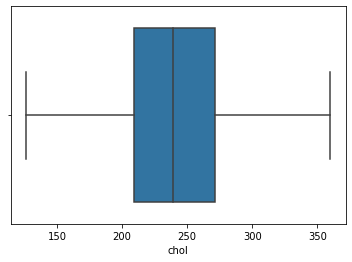

In [55]:
# Outliers remove in Column "Chol"
sns.boxplot(df_t1["chol"])
plt.show()

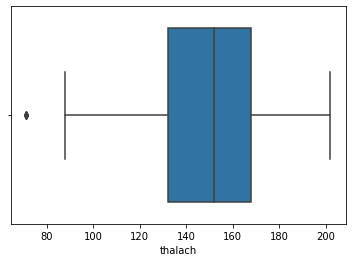

In [57]:
sns.boxplot(df_t1["thalach"])
plt.show()

In [60]:
Q3 = df_t1["thalach"].quantile(0.75)
Q1 = df_t1["thalach"].quantile(0.25)
IQR = Q3-Q1
print("value of the inter quartile range:",IQR)

value of the inter quartile range: 36.0


In [62]:
lower_limit = Q1 - (IQR*1.5)
upper_limit = Q3 + (IQR*1.5)
print("lower_limit:",lower_limit)
print("upper_limit:",upper_limit)

lower_limit: 78.0
upper_limit: 222.0


In [63]:
df_t2 = df_t1[(df_t1["thalach"]>lower_limit) & (df_t1["thalach"]<upper_limit)]

In [64]:
df_t2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


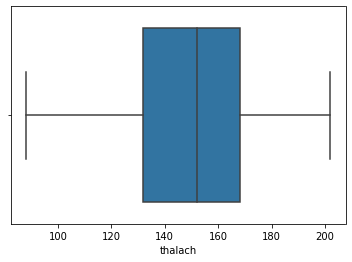

In [67]:
# Outliers remove in column thlach
sns.boxplot(df_t2["thalach"])
plt.show()

Number of  male:  713
Number of female:  312


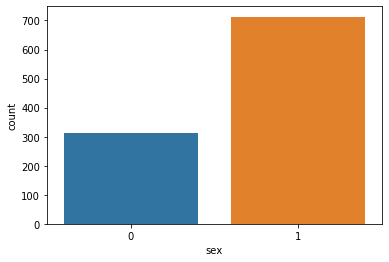

In [73]:
sns.countplot(data = df,x ="sex")
M, F = df['sex'].value_counts()
print('Number of  male: ',M)
print('Number of female: ',F)
plt.show()